<a href="https://colab.research.google.com/github/tjamcclain2/Northstar-Python-/blob/main/0805_working%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 45.0.6 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 45.0.6 which is incompatible.


/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


✅ GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
📦 Loaded 90 events from GWTC


Adding noise: 100%|██████████| 200/200 [00:09<00:00, 20.72it/s]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32768, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 32768, 16)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 16384, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 16384, 8)       │         1,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 8192, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 8192, 8)        │           968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d (UpSampling1D)    │ (None, 16384, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16384, 16)      │         3,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_1 (UpSampling1D)  │ (None, 32768, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 32768, 1)       │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,409 (28.94 KB)

 Trainable params: 7,409 (28.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
18/18 - 6s - 358ms/step - loss: 0.0013 - val_loss: 4.3796e-04
Epoch 2/10
18/18 - 0s - 20ms/step - loss: 3.9792e-04 - val_loss: 2.3705e-04
Epoch 3/10
18/18 - 0s - 20ms/step - loss: 2.9979e-04 - val_loss: 2.1802e-04
Epoch 4/10
18/18 - 0s - 20ms/step - loss: 2.7250e-04 - val_loss: 2.0716e-04
Epoch 5/10
18/18 - 0s - 20ms/step - loss: 2.5515e-04 - val_loss: 2.0164e-04
Epoch 6/10
18/18 - 0s - 20ms/step - loss: 2.4330e-04 - val_loss: 1.8902e-04
Epoch 7/10
18/18 - 0s - 20ms/step - loss: 2.3480e-04 - val_loss: 1.7331e-04
Epoch 8/10
18/18 - 0s - 20ms/step - loss: 2.1852e-04 - val_loss: 1.6215e-04
Epoch 9/10
18/18 - 0s - 20ms/step - loss: 2.0219e-04 - val_loss: 1.4795e-04
Epoch 10/10
18/18 - 0s - 20ms/step - loss: 1.8496e-04 - val_loss: 1.5529e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


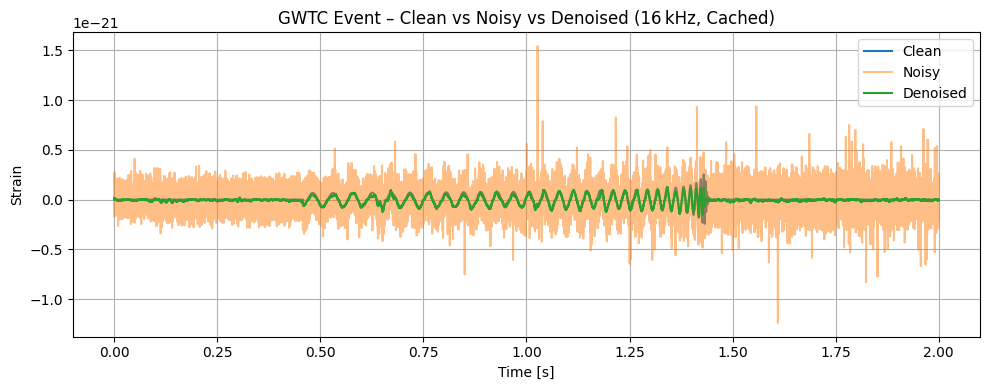

In [1]:
# ───────────── 0. INSTALL DEPENDENCIES ─────────────
!pip install pycbc tqdm tensorflow matplotlib numpy >/dev/null

# ───────────── 1. IMPORTS ─────────────
import requests
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import tensorflow as tf
from tensorflow.keras import layers, models
from pycbc.waveform import get_td_waveform

# ───────────── 2. GPU SETUP ─────────────
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("✅ GPU available:", gpus)
else:
    print("❌ No GPU detected — enable it in Colab (Runtime → Change runtime type → GPU)")

# ───────────── 3. LOAD GWTC EVENTS ─────────────
def load_gwtc_events():
    url = "https://gwosc.org/eventapi/jsonfull/GWTC/"
    resp = requests.get(url)
    resp.raise_for_status()
    data = resp.json()
    events = []
    for key, info in data["events"].items():
        try:
            m1 = info["mass_1_source"]
            m2 = info["mass_2_source"]
            dist = info["luminosity_distance"]
            chi = info.get("chi_eff", 0.0)
            if None not in (m1, m2, dist):
                events.append({
                    "name": key.split("-")[0],
                    "mass1": m1,
                    "mass2": m2,
                    "distance": dist,
                    "chi_eff": chi if chi is not None else 0.0
                })
        except:
            continue
    return events

# ───────────── 4. PRE-GENERATE CLEAN WAVEFORMS ─────────────
def cache_waveforms(events, duration=2.0, fs=16384):
    N = int(duration * fs)
    delta_t = 1 / fs
    f_lower = 20.0
    cache = {}

    for ev in trange(len(events), desc="Caching clean waveforms"):
        try:
            hp, _ = get_td_waveform(
                approximant="SEOBNRv4",
                mass1=events[ev]["mass1"],
                mass2=events[ev]["mass2"],
                spin1z=events[ev]["chi_eff"],
                spin2z=0.0,
                distance=events[ev]["distance"],
                delta_t=delta_t,
                f_lower=f_lower
            )
            sig = hp.data
            if len(sig) > N:
                sig = sig[:N]
            else:
                pad = N - len(sig)
                sig = np.pad(sig, (pad//2, pad - pad//2), mode="constant")
            cache[events[ev]["name"]] = sig
        except Exception as e:
            print(f"⚠️ Skipped {events[ev]['name']}: {e}")
    return cache

# ───────────── 5. DATASET BUILDER USING CACHE ─────────────
def build_training_data_from_cache(cache, nsamp=500, fs=16384):
    event_names = list(cache.keys())
    N = len(next(iter(cache.values())))
    X = np.zeros((nsamp, N, 1), dtype=np.float32)
    Y = np.zeros((nsamp, N, 1), dtype=np.float32)

    def add_extreme_noise(sig, sigma):
        t = np.arange(len(sig)) / fs
        white = np.random.normal(0, 2.0 * sigma, size=N)
        env = 0.2 + 2.0 * np.abs(np.sin(2 * np.pi * 0.1 * t))
        heavy = np.random.standard_t(3, size=N)
        heavy = (heavy / np.std(heavy)) * (sigma * env)
        glitches = np.zeros(N)
        for _ in range(np.random.poisson(20 * t[-1])):
            tg = np.random.uniform(0, t[-1])
            amp = np.random.uniform(0.2, 2.0) * sigma
            wid = np.random.uniform(0.002, 0.02)
            freq = np.random.uniform(50, 300)
            sg = amp * np.exp(-0.5 * ((t - tg) / wid)**2) * np.sin(2*np.pi*freq*(t - tg))
            glitches += sg
        return sig + white + heavy + glitches

    for i in trange(nsamp, desc="Adding noise"):
        ev = np.random.choice(event_names)
        clean = cache[ev]
        sigma = np.std(clean)
        noisy = add_extreme_noise(clean, sigma)
        X[i,:,0] = noisy
        Y[i,:,0] = clean

    scale = np.max(np.abs(Y))
    return X / scale, Y / scale, scale, np.arange(N) / fs

# ───────────── 6. AUTOENCODER ─────────────
def build_autoencoder(N):
    inp = layers.Input((N, 1))
    x = layers.Conv1D(16, 31, activation='relu', padding='same')(inp)
    x = layers.MaxPooling1D(2, padding='same')(x)
    x = layers.Conv1D(8, 15, activation='relu', padding='same')(x)
    encoded = layers.MaxPooling1D(2, padding='same')(x)

    x = layers.Conv1D(8, 15, activation='relu', padding='same')(encoded)
    x = layers.UpSampling1D(2)(x)
    x = layers.Conv1D(16, 31, activation='relu', padding='same')(x)
    x = layers.UpSampling1D(2)(x)
    decoded = layers.Conv1D(1, 1, activation='linear', padding='same')(x)

    model = models.Model(inp, decoded)
    model.compile(optimizer='adam', loss='mse')
    return model

# ───────────── 7. RUN PIPELINE ─────────────
events = load_gwtc_events()
print(f"📦 Loaded {len(events)} events from GWTC")

cache = cache_waveforms(events, duration=2.0, fs=16384)  # Progress bar shows here
X, Y, scale, t = build_training_data_from_cache(cache, nsamp=200, fs=16384)  # Progress bar here too

perm = np.random.permutation(len(X))
split = int(0.8 * len(X))
X_tr, Y_tr = X[perm[:split]], Y[perm[:split]]
X_te, Y_te = X[perm[split:]], Y[perm[split:]]

model = build_autoencoder(X.shape[1])
model.summary()
model.fit(X_tr, Y_tr, epochs=10, batch_size=8, validation_split=0.1, verbose=2)

# ───────────── 8. TEST & PLOT ─────────────
i = np.random.randint(len(X_te))
noisy  = X_te[i,:,0]
den    = model.predict(noisy[None,:,None])[0,:,0]
clean  = Y_te[i,:,0]

plt.figure(figsize=(10,4))
plt.plot(t, clean * scale, label='Clean')
plt.plot(t, noisy * scale, label='Noisy', alpha=0.5)
plt.plot(t, den * scale, label='Denoised')
plt.xlabel("Time [s]")
plt.ylabel("Strain")
plt.title("GWTC Event – Clean vs Noisy vs Denoised (16 kHz, Cached)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()